In [1]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.8 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1054131 sha256=8664dbe8cb0e3d3e7fd2fd6f2546c2d8898b4bc62be7c54222638dd2bc13e83f
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [6]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.3 MB/s eta 0:00:00


In [7]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import onnxruntime
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [8]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.23.5


In [9]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 65864.48KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


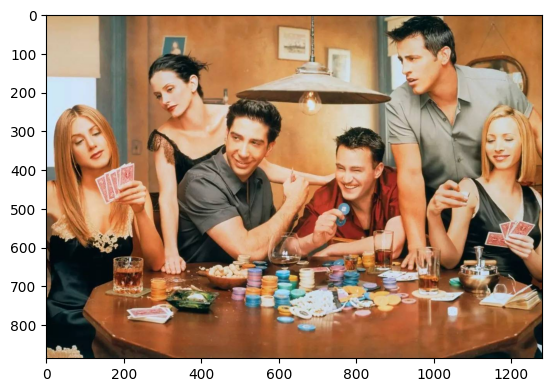

In [14]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [13]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))
img = ins_get_image('t1')
faces = app.get(img)
rimg = app.draw_on(img, faces)
cv2.imwrite("./t1_output.jpg", rimg)

/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


True

In [12]:
faces = app.get(img)
res = mont.copy()
for face in faces:
  res = swapper.get(res, face, rob_face, paste_back=True)
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-l])
ax.axis('off')
plt.show()


NameError: name 'mont' is not defined

In [20]:
!gdown 1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF

Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=bb4b45ca-9b59-4c44-9774-990ba6ee832d
To: /content/inswapper_128.onnx
100% 554M/554M [00:02<00:00, 193MB/s]


In [21]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [27]:
def swap_n_show(img1_fn,
                img2_fn,
                app,
                swapper,
                plot_before=True,
                plot_after=True):
  img1 = cv2.imread(img1_fn)
  img2 = cv2.imread(img2_fn)

  if plot_before:
      fig, ax = plt.subplots(1, 2, figsize=(10, 5))
      axs[0].imshow(img1[:])
      axs[0].axis('off')
      axs[1].imshow(img2[:])
      axs[1].axis('off')
      plt.show()
  face1 = app.get(img1)[0]
  face2 = app.get(img2)[0]
  img1_ = img1.copy()
  img2_ = img2.copy()
  if plot_after:
      img1_ = swapper.get(img1_, face1, face2, paste_back=True)
      img2_ = swapper.get(img2_, face2, face1, paste_back=True)
      fig, axs = plt.subplots(1, 2, figsize=(10, 5))
      axs[0].imshow(img1[:,:,::-1])
      axs[0].axis('off')
      axs[1].imshow(img2[:,:,::-1])
      axs[1].axis('off')
      plt.show()






UnboundLocalError: local variable 'axs' referenced before assignment

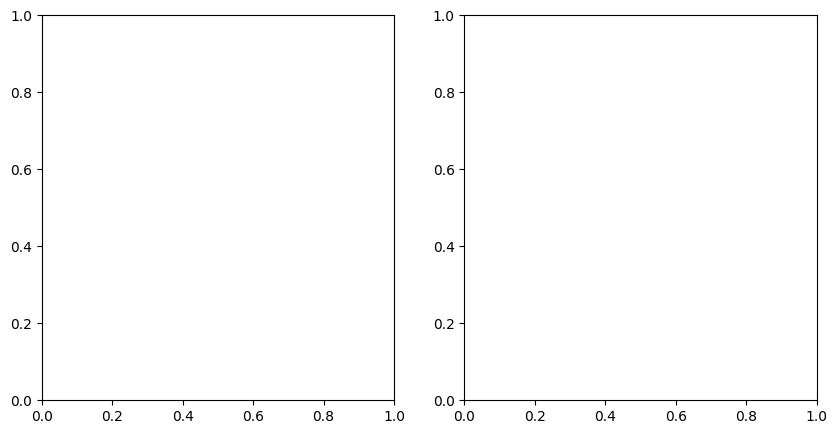

In [28]:
swap_n_show('1.jpg', '2.jpg', app, swapper)

In [29]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

In [30]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.23.5


In [31]:
assert float('.'.join(insightface.__version__.split('.')[:2]))>=float('0.7')

In [32]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [33]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                download=False,
                                download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


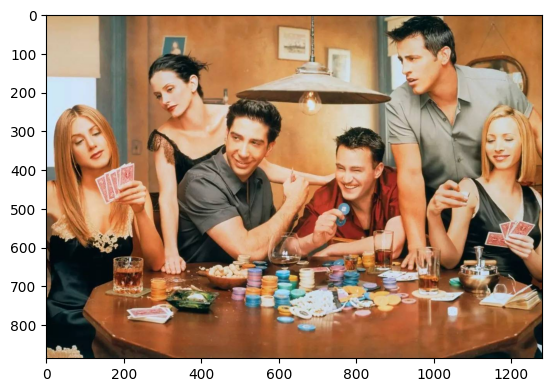

In [34]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [35]:
faces = app.get(img)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


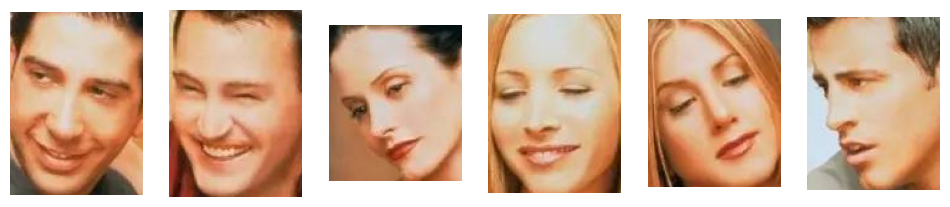

In [36]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

In [37]:
faces = sorted(faces, key = lambda x : x.bbox[0])
res = img.copy()
assert len(faces)==6 # Confirm 6 faces found
source_face = faces[2]

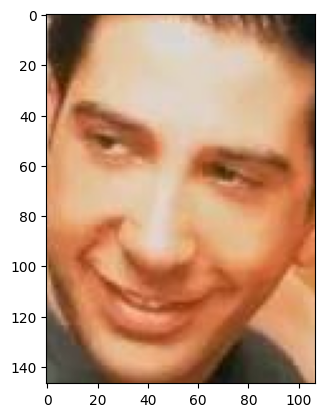

In [38]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [39]:
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

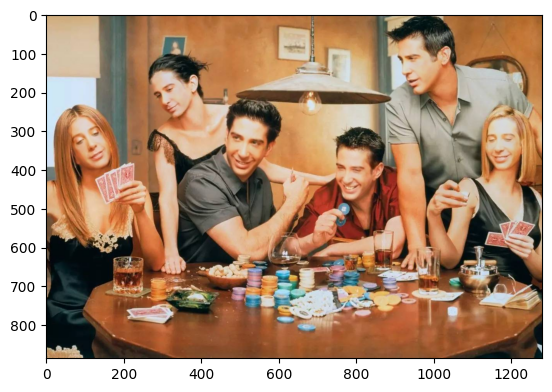

In [40]:
plt.imshow(res[:,:,::-1])
plt.show()

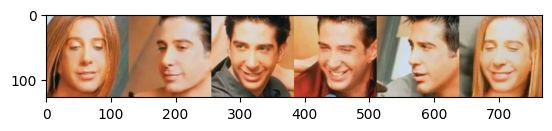

In [41]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

In [42]:
rob = cv2.imread('1.jpg')

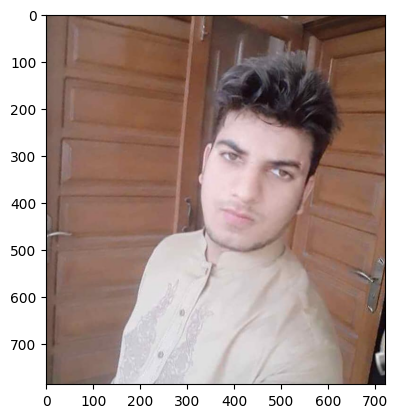

In [43]:
plt.imshow(rob[:,:,::-1])
plt.show()

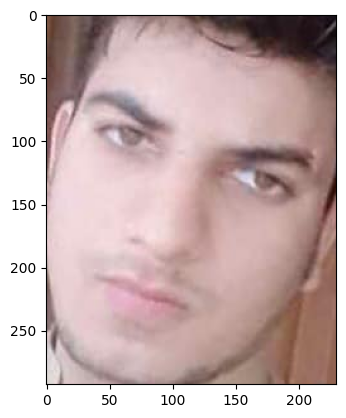

In [44]:
rob_faces = app.get(rob)
assert len(rob_faces) == 1
rob_face = rob_faces[0]
bbox = rob_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(rob[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [45]:
faces = app.get(img)

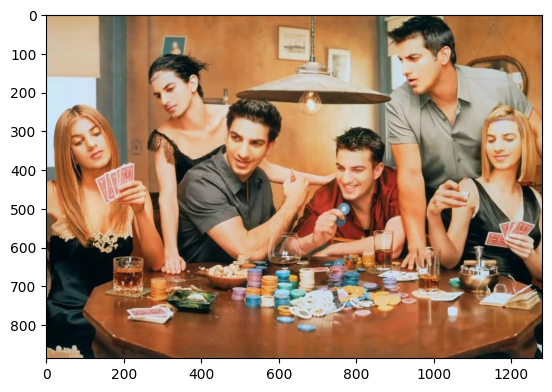

In [46]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show()

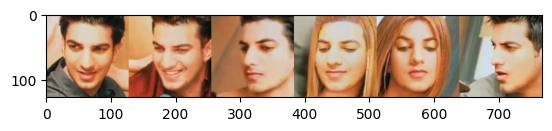

In [47]:
res = []
for face in faces:
    _img, _ = swapper.get(img,
                          face,
                          rob_face,
                          paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)

plt.imshow(res[:,:,::-1])
plt.show()

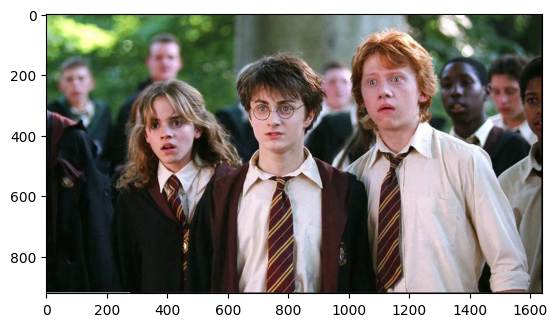

In [50]:
monty = cv2.imread('HP.PNG')
plt.imshow(monty[:,:,::-1])
plt.show()

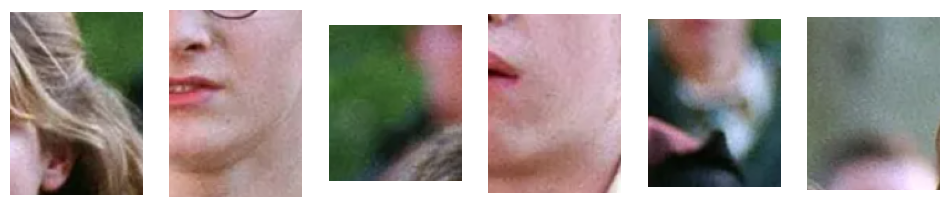

In [53]:
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(monty[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

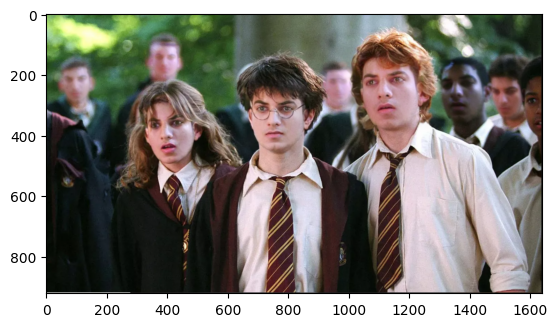

In [54]:
faces = app.get(monty)
res = monty.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show()

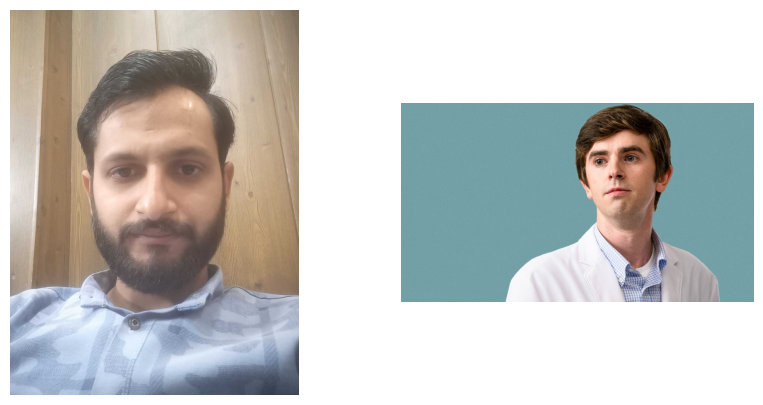

In [62]:
img1 = cv2.imread('2.jpg')
img2 = cv2.imread('4.jpeg')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2[:,:,::-1])
axs[1].axis('off')
plt.show()

In [63]:
face1 = app.get(img1)[0]
face2 = app.get(img2)[0]

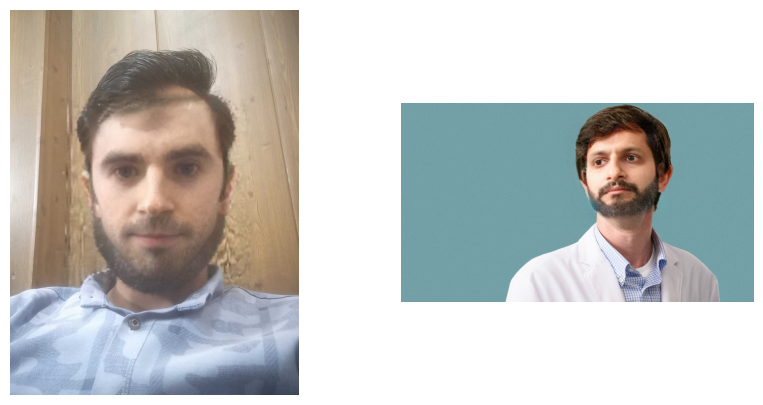

In [64]:
img1_ = img1.copy()
img2_ = img2.copy()
img1_ = swapper.get(img1_, face1, face2, paste_back=True)
img2_ = swapper.get(img2_, face2, face1, paste_back=True)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1_[:,:,::-1])
axs[0].axis('off')
axs[1].imshow(img2_[:,:,::-1])
axs[1].axis('off')
plt.show()

In [ ]:
def swap_n_show(img1_fn, img2_fn, app, swapper,
                plot_before=True, plot_after=True):
    """
    Uses face swapper to swap faces in two different images.

    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap

    returns images with swapped faces.

    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)

    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        plt.show()

    # Do the swap
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    return img1_, img2_

In [ ]:
_ = swap_n_show('obi-wan.jpeg', 'spock.jpg', app, swapper)

In [ ]:
def swap_n_show_same_img(img1_fn,
                         app, swapper,
                         plot_before=True,
                         plot_after=True):
    """
    Uses face swapper to swap faces in the same image.

    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap

    returns images with swapped faces.

    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)

    if plot_before:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1[:,:,::-1])
        ax.axis('off')
        plt.show()

    # Do the swap
    faces = app.get(img1)
    face1, face2 = faces[0], faces[1]

    img1_ = img1.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img1_ = swapper.get(img1_, face2, face1, paste_back=True)
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.imshow(img1_[:,:,::-1])
        ax.axis('off')
        plt.show()
    return img1_

In [ ]:
_ = swap_n_show_same_img('rush-hour.jpg', app, swapper)

In [ ]:
cow = cv2.imread('cow.jpg')
plt.imshow(cow[:,:,::-1])
plt.show()

In [ ]:
app.get(cow)


In [ ]:
from glob import glob
couples = glob('couple*')

In [ ]:
for couple in couples:
    _ = swap_n_show_same_img(couple, app, swapper)